Below is the code for my best submission in the Santander Product Recommendation Kaggle Competition (a link to the competition: https://www.kaggle.com/c/santander-product-recommendation). This competition interested me because I had never created a recommendation model before, and it seemed like a good challenge. The goal of this competition is to recommend new products to customers.

The section of the analysis are:
-Inspecting the data
-Cleaning a sample of the data
-Feature Engineering a sample of the data
-Cleaning and Feature Engineering the data to be used to train the model and make predictions with
-Building the Model
-A summary of my findings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import accuracy_score
import xgboost as xgb

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Load the datasets

In [2]:
train = pd.read_csv("/Users/Dave/Desktop/Programming/Personal Projects/Santander-Kaggle/train.csv")
test = pd.read_csv("/Users/Dave/Desktop/Programming/Personal Projects/Santander-Kaggle/test.csv")

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Convert all the dates to datetime

In [3]:
train.fecha_dato = pd.to_datetime(train.fecha_dato, format="%Y-%m-%d")
train.fecha_alta = pd.to_datetime(train.fecha_alta, format="%Y-%m-%d")
test.fecha_dato = pd.to_datetime(test.fecha_dato, format="%m/%d/%y")
test.fecha_alta = pd.to_datetime(test.fecha_alta, format="%m/%d/%y")

# Inspect the Data

Let's take a preview at the data we are working with

In [4]:
pd.set_option('display.max_columns', 50)
train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [5]:
train.describe()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,3.939238e-04,8.086722e-02,9.474175e-03,9.726606e-03,1.290083e-01,4.330583e-02,1.778739e-03,1.660987e-03,4.296679e-02,8.274357e-02,1.848599e-02,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,1.984361e-02,2.726311e-01,9.687320e-02,9.814275e-02,3.352091e-01,2.035447e-01,4.213757e-02,4.072135e-02,2.027823e-01,2.754942e-01,1.347006e-01,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.528130e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00
50%,9.318930e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00
75%,1.199286e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


We can already see that we have some missing values.

In [6]:
train.describe(include = ['object'])

,ind_empleado,pais_residencia,sexo,age,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13619575,13619575,13619505,13647309,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,5,118,2,235,507,223,13.0,5,2,2,2,162,2,52,3
top,N,ES,V,23,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,13610977,13553710,7424252,542682,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


In [7]:
test.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,NaN,1.0,A,S,N,N,KAT,N,1,28.0,MADRID,1,326124.9,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,NaN,1.0,A,S,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.8,03 - UNIVERSITARIO


In [8]:
print train.shape
print test.shape

(13647309, 48)
(929615, 24)


In [9]:
train.isnull().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

There are numerous features with the same number of missing values, I expect those relate to the same rows. ult_fec_cli_1t and conyuemp are missing most of their data, hopefully we can extract some use from those features.

Combine the train and test sets to explore and clean the data.

In [4]:
df = pd.concat([train,test], axis = 0, ignore_index = True)

Let's drop all of the rows that we think have numerous missing features.

In [5]:
badRows = train[train.ind_empleado.isnull()].index

In [6]:
df = df.drop(badRows, axis = 0)

In [99]:
df.isnull().sum()

age                            0
antiguedad                     0
canal_entrada                  0
ind_actividad_cliente          0
ind_nuevo                      0
indrel                         0
ncodpers                       0
nomprov                        0
pais_residencia                0
renta                          0
tipodom                        0
ageGroup                       0
isSpanish                      0
majorCity                      0
fecha_alta_year                0
fecha_dato_year                0
fecha_alta_month               0
fecha_dato_month               0
antiguedad_years               0
HAS_ult_fec_cli_1t             0
rentaGroup                     0
ind_empleado_A                 0
ind_empleado_B                 0
ind_empleado_F                 0
ind_empleado_N                 0
ind_empleado_S                 0
sexo_H                         0
sexo_V                         0
tiprel_1mes_A                  0
tiprel_1mes_I                  0
tiprel_1me

Although we have many new missing values bacause the test dataset does not include the target features, we have removed many of the nulls values that we had before.

To explore and clean the data quicker, let's take a sample of the dataset.

In [7]:
smallDF = df.sample(frac = 0.15, random_state = 2)

In [8]:
len(smallDF)

2182379

Let's double check to make sure everything is alright before we start cleaning and exploring the data.

In [174]:
smallDF.isnull().sum()

age                            0
antiguedad                     0
canal_entrada                  0
conyuemp                       0
fecha_alta                     0
fecha_dato                     0
ind_actividad_cliente          0
ind_ahor_fin_ult1         139579
ind_aval_fin_ult1         139579
ind_cco_fin_ult1          139579
ind_cder_fin_ult1         139579
ind_cno_fin_ult1          139579
ind_ctju_fin_ult1         139579
ind_ctma_fin_ult1         139579
ind_ctop_fin_ult1         139579
ind_ctpp_fin_ult1         139579
ind_deco_fin_ult1         139579
ind_dela_fin_ult1         139579
ind_deme_fin_ult1         139579
ind_ecue_fin_ult1         139579
ind_empleado                   0
ind_fond_fin_ult1         139579
ind_hip_fin_ult1          139579
ind_nom_pens_ult1         139601
ind_nomina_ult1           139601
ind_nuevo                      0
ind_plan_fin_ult1         139579
ind_pres_fin_ult1         139579
ind_reca_fin_ult1         139579
ind_recibo_ult1           139579
ind_tjcr_f

Everything looks good, let the cleaning begin!

# Clean the Data

In [17]:
smallDF.canal_entrada.value_counts()

KHE    646265
KAT    519969
KFC    494323
KHQ    100054
KFA     65233
KHK     38723
KHM     32555
KHN     20220
KHD     18628
KAS     13658
RED     12321
KAG     11605
KAY     10838
KAA     10734
KAB     10051
KAE      8114
KCC      7918
KBZ      7402
KHL      7394
KFD      7056
KAI      5940
KEY      5576
KAW      5415
KAR      5242
KAZ      5131
KAF      4980
007      4263
KCI      4197
013      4039
KAH      3963
        ...  
004        35
KBD        35
KCQ        35
KDH        34
KCO        33
KEC        32
KBX        29
KCV        27
KCP        24
K00        23
KEQ        22
KAV        20
KBE        19
KBP        18
KCT        16
KEM        14
KFB        12
KFV        11
KCX        10
KBN         9
KDB         5
KHA         5
KGU         5
KHS         3
KDI         3
KGC         3
4           2
KDL         2
025         1
KGN         1
Name: canal_entrada, dtype: int64

I think it would be too difficult to make a fair guess, so let's just set the missing values to Unknown.

In [9]:
smallDF.canal_entrada = smallDF.canal_entrada.fillna("Unknown")

Since cod_prov is the province's code, we can drop this variable because we already have nomprov, the names of the provinces, which we can change to a categorical feature. You might be thinking, why not just keep cod_prov and save a step, but I think it would be easier to ensure that the data is correct and easier to feature engineer if we use the provinces' names instead.

In [10]:
smallDF = smallDF.drop("cod_prov", 1)

In [20]:
smallDF.conyuemp.value_counts()

N    280
S      4
Name: conyuemp, dtype: int64

To avoid making any grand assumptions, I will set the null values to Unknown. This avoids greatly altering the ratio of 'N' to 'S'.

In [11]:
smallDF.conyuemp = smallDF.conyuemp.fillna("Unknown")

In [12]:
smallDF.indrel_1mes.value_counts()

1.0    1230234
1.0     603469
1       329371
3.0        278
3.0        203
3          184
P          142
2.0         83
2           73
2.0         49
4           20
4.0         17
4.0         13
Name: indrel_1mes, dtype: int64

Since this feature describes types of customer, it would make more sense for it to be a categorical feature. Let's change the numeric features to string, then use one-hot-encoding later.

In [13]:
smallDF.loc[smallDF.indrel_1mes == '1', 'indrel_1mes'] = 'Primary'
smallDF.loc[smallDF.indrel_1mes == '1.0', 'indrel_1mes'] = 'Primary'
smallDF.loc[smallDF.indrel_1mes == 1, 'indrel_1mes'] = 'Primary'
smallDF.loc[smallDF.indrel_1mes == 1.0, 'indrel_1mes'] = 'Primary'

smallDF.loc[smallDF.indrel_1mes == '2', 'indrel_1mes'] = 'Co-owner'
smallDF.loc[smallDF.indrel_1mes == '2.0', 'indrel_1mes'] = 'Co-owner'
smallDF.loc[smallDF.indrel_1mes == 2, 'indrel_1mes'] = 'Co-owner'
smallDF.loc[smallDF.indrel_1mes == 2.0, 'indrel_1mes'] = 'Co-owner'

smallDF.loc[smallDF.indrel_1mes == '3', 'indrel_1mes'] = 'Former Primary'
smallDF.loc[smallDF.indrel_1mes == '3.0', 'indrel_1mes'] = 'Former Primary'
smallDF.loc[smallDF.indrel_1mes == 3, 'indrel_1mes'] = 'Former Primary'
smallDF.loc[smallDF.indrel_1mes == 3.0, 'indrel_1mes'] = 'Former Primary'

smallDF.loc[smallDF.indrel_1mes == '4', 'indrel_1mes'] = 'Former Co-owner'
smallDF.loc[smallDF.indrel_1mes == '4.0', 'indrel_1mes'] = 'Former Co-owner'
smallDF.loc[smallDF.indrel_1mes == 4, 'indrel_1mes'] = 'Former Co-owner'
smallDF.loc[smallDF.indrel_1mes == 4.0, 'indrel_1mes'] = 'Former Co-owner'

Let's see if everything worked out okay.

In [172]:
smallDF.indrel_1mes.value_counts()

Primary            2163074
Former Primary         665
Co-owner               205
P                      142
Former Co-owner         50
Name: indrel_1mes, dtype: int64

Good, now let's set the missing values to the most common, Primary.

In [14]:
smallDF.indrel_1mes = smallDF.indrel_1mes.fillna('Primary')

In [90]:
smallDF.nomprov.value_counts()

MADRID                    705468
BARCELONA                 204818
VALENCIA                  109267
SEVILLA                    96522
CORUÑA, A                  68849
MURCIA                     63912
MALAGA                     59062
ZARAGOZA                   54801
ALICANTE                   50193
CADIZ                      47196
PONTEVEDRA                 45009
ASTURIAS                   42097
VALLADOLID                 38472
PALMAS, LAS                37763
BADAJOZ                    30828
BIZKAIA                    29678
TOLEDO                     29427
GRANADA                    28531
SALAMANCA                  26291
CANTABRIA                  24898
CORDOBA                    23071
CACERES                    20972
BALEARS, ILLES             20071
HUELVA                     19630
CIUDAD REAL                19108
ALBACETE                   18101
CASTELLON                  16669
TARRAGONA                  16108
BURGOS                     15485
GIRONA                     14641
NAVARRA   

Let's change all the null values to the most common, MADRID.

In [15]:
smallDF.nomprov = smallDF.nomprov.fillna("MADRID")

In [136]:
smallDF.renta.value_counts()

0.00         33742
451931.22      936
463625.16      278
181042.20      236
105260.88      212
488798.49      211
128318.52      206
127141.50      196
283325.67      184
236690.34      170
132335.73      157
273387.54      148
104563.80      147
111933.69      142
174407.10      135
227267.49      133
163432.47      125
218030.01      123
155930.43      120
288997.44      116
208961.79      115
168733.62      112
227397.72      110
91673.25       108
326853.09      105
47550.39       104
152601.99      103
135522.15      102
104040.18       98
130423.44       98
             ...  
84985.23         1
76396.20         1
85438.08         1
39066.09         1
86382.57         1
60370.98         1
151318.44        1
126575.61        1
193155.96        1
79990.08         1
150589.17        1
187229.61        1
457312.68        1
73288.53         1
128790.39        1
106697.49        1
77561.46         1
22572.27         1
135491.28        1
69376.98         1
63944.19         1
125107.77   

Maybe we can fill in the null values with the median renta for each province.

In [16]:
smallDF.loc[smallDF.renta == '         NA',"renta"] = 0
smallDF.renta = smallDF.renta.astype(float)

In [156]:
smallDF.renta.isnull().sum()

415598

In [17]:
smallDF.loc[smallDF.renta == 0, 'renta'] = smallDF[smallDF.renta > 0].groupby('nomprov').renta.transform('median')
smallDF.loc[smallDF.renta.isnull(), "renta"] = smallDF.groupby('nomprov').renta.transform('median')

In [165]:
smallDF.renta.isnull().sum()

0

Yup, that got everything cleared up.

In [175]:
smallDF.segmento.value_counts()

02 - PARTICULARES     1275744
03 - UNIVERSITARIO     792495
01 - TOP                89721
Name: segmento, dtype: int64

Rather than setting all the null values to the most common, let's see if there's a relationship between renta and segmento that we could use.

In [176]:
smallDF.renta.groupby([smallDF.segmento]).median()

segmento
01 - TOP              136726.62
02 - PARTICULARES     103124.43
03 - UNIVERSITARIO     89073.90
Name: renta, dtype: float64

Good, there is! Let's use these values to help assign new values to the null values.

In [18]:
smallDF.segmento = smallDF[smallDF.renta <= 96000].segmento.fillna("03 - UNIVERSITARIO")
smallDF.segmento = smallDF[smallDF.renta <= 119500].segmento.fillna("02 - PARTICULARES")
smallDF.segmento = smallDF.segmento.fillna("01 - TOP")

In [178]:
smallDF.sexo.value_counts()

V    1189290
H     993078
Name: sexo, dtype: int64

There are not many missing values in sexo, so we can just set them to the majority, V.

In [19]:
smallDF.sexo = smallDF.sexo.fillna("V")

In [181]:
smallDF.tiprel_1mes.value_counts()

I    1177010
A     986269
P        715
R        141
N          1
Name: tiprel_1mes, dtype: int64

Perhaps there is also a relationship between renta and tiprel_1mes to help us better assign values to the null values.

In [185]:
smallDF.renta.groupby(smallDF.tiprel_1mes).median()

tiprel_1mes
A    103917.18
I     94918.47
N    138965.46
P    105225.24
R     99740.88
Name: renta, dtype: float64

In [191]:
smallDF[smallDF.renta >= 99500].tiprel_1mes.value_counts()

A    532720
I    532295
P       389
R        76
N         1
Name: tiprel_1mes, dtype: int64

I am not too convinced that there is a strong enough of a relationship between renta and tiprel_1mes to be useful. To keep things simple, I going to assign the null values to the most popular, I.

In [20]:
smallDF.tiprel_1mes = smallDF.tiprel_1mes.fillna('I')

In [193]:
smallDF.ult_fec_cli_1t.value_counts()

2015-12-24    133
2015-12-28     73
2015-07-21     70
2015-07-09     67
2015-07-06     64
2015-07-07     51
2015-07-10     51
2015-07-24     51
2015-07-22     49
2015-07-01     48
2015-07-17     45
2015-07-03     45
2015-07-23     44
2015-07-20     44
2015-07-29     43
2015-07-15     43
2015-07-28     40
2015-07-27     36
2015-07-14     35
2015-07-30     34
2015-07-02     29
2015-07-13     29
2015-12-17     29
2015-12-21     28
2015-12-18     26
2015-12-16     26
2015-07-08     26
2016-01-05     25
2016-05-02     24
2015-07-16     24
             ... 
2016-04-22      8
06/28/16        8
2016-03-24      8
2016-04-26      7
2015-09-09      7
2016-05-09      7
2015-10-02      7
2015-08-19      6
2015-09-21      6
2015-12-23      6
2016-04-20      6
2015-08-26      6
2015-11-05      6
2016-03-03      6
2015-08-06      6
2015-11-26      5
2016-03-15      5
2016-01-04      5
2015-08-20      5
2016-03-07      5
2016-01-22      5
2015-08-14      5
06/29/16        5
2016-03-23      4
2015-08-21

Given the number of missing values, I am not going to try and find values for them, but I am going to keep this feature, which will be used in the feature engineering section.

In [194]:
smallDF.ind_nomina_ult1.value_counts()

0.0    1931268
1.0     111510
Name: ind_nomina_ult1, dtype: int64

Assign nulls to the most popular, 0.0

In [21]:
smallDF.ind_nomina_ult1 = smallDF.ind_nomina_ult1.fillna(0.0)

In [196]:
smallDF.ind_nom_pens_ult1.value_counts()

0.0    1921793
1.0     120985
Name: ind_nom_pens_ult1, dtype: int64

Assign nulls to the most popular, 0.0

In [22]:
smallDF.ind_nom_pens_ult1 = smallDF.ind_nom_pens_ult1.fillna(0.0)

In [202]:
smallDF.antiguedad.value_counts()

1          20316
0          20099
12         20054
3          19697
2          19447
5          19399
8          18736
7          18520
4          18450
     21    17950
6          17432
16         17421
14         17405
9          17165
21         17140
17         17129
18         17083
10         17030
15         16934
19         16928
     12    16887
23         16706
11         16645
20         16572
13         16524
24         16517
26         16186
25         15505
22         15503
27         15217
           ...  
    215      465
    228      439
    229      437
    234      434
    238      432
    203      379
249          359
    230      350
    236      338
    226      308
    240      297
      1      296
    241      294
    233      292
250          262
251          214
    227      183
    242      165
252          152
    239      141
    243      105
253           98
    246       94
    244       61
    245       61
254           58
255           37
256           

The values equalling -999999 don't look right. Let's substitute them for the median value.

In [23]:
smallDF.loc[smallDF.antiguedad == -999999, 'antiguedad'] = smallDF[smallDF.antiguedad >= 0].antiguedad.median()

In [226]:
smallDF.indrel.value_counts()

1.0     2178359
99.0       4020
Name: indrel, dtype: int64

Change 99.0 to 0.0 so that it is already scaled for gradient descent. 

In [33]:
smallDF.loc[smallDF.indrel == 99.0, "indrel"] = 0.0

Let's see if we have everything clean.

In [199]:
smallDF.isnull().sum()

age                            0
antiguedad                     0
canal_entrada                  0
conyuemp                       0
fecha_alta                     0
fecha_dato                     0
ind_actividad_cliente          0
ind_ahor_fin_ult1         139579
ind_aval_fin_ult1         139579
ind_cco_fin_ult1          139579
ind_cder_fin_ult1         139579
ind_cno_fin_ult1          139579
ind_ctju_fin_ult1         139579
ind_ctma_fin_ult1         139579
ind_ctop_fin_ult1         139579
ind_ctpp_fin_ult1         139579
ind_deco_fin_ult1         139579
ind_dela_fin_ult1         139579
ind_deme_fin_ult1         139579
ind_ecue_fin_ult1         139579
ind_empleado                   0
ind_fond_fin_ult1         139579
ind_hip_fin_ult1          139579
ind_nom_pens_ult1              0
ind_nomina_ult1                0
ind_nuevo                      0
ind_plan_fin_ult1         139579
ind_pres_fin_ult1         139579
ind_reca_fin_ult1         139579
ind_recibo_ult1           139579
ind_tjcr_f

Yes we do! On to the feature engineering stage!

# Feature Engineering

Let's start off by taking a look at ages. 

In [203]:
smallDF.age.value_counts().sort_index()

2         88
3        207
4        262
5        358
6        413
7        397
8        506
9        623
10       865
11      1129
12      1362
13      1470
14      1413
15      1465
16      1344
17      1350
18      1295
19      2702
20     58710
21     82473
22     86357
23     88949
24     86748
25     58293
26     41453
27     33644
28     28680
29     24748
30     22295
31     20359
       ...  
 86      959
 87      982
 88      893
 89      767
 90      685
 91      610
 92      511
 93      442
 94      370
 95      311
 96      272
 97      225
 98      146
 99      152
100      104
101       97
102       94
103       54
104       44
105       45
106       34
107       24
108        7
109       12
110        4
111       10
112        6
113        3
115        4
116        2
Name: age, dtype: int64

In [24]:
smallDF.age = smallDF.age.astype(int)

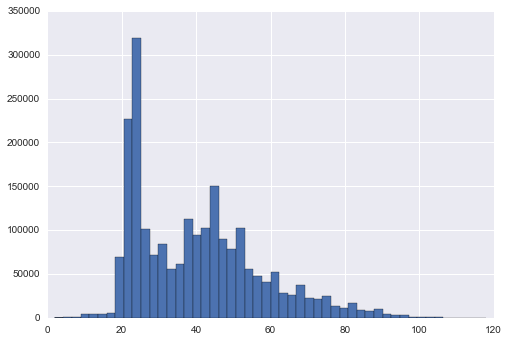

In [207]:
plt.hist(smallDF.age, bins = 50)
plt.show()

Some of these values are probably incorrect. I doubt most of the oldest people in the world are all banking with Santander. There are also quite a few, very young people, i.e. younger than 10. Because there is quite a jump in frequency between 19 and 20, I'm going to group everyone younger than 20 together. I'll also group people older than 90 together.

In [25]:
smallDF.loc[smallDF.age < 20,"age"] = 19
smallDF.loc[smallDF.age > 90,"age"] = 91

Group people in sets of 10 years. Subtract 1 so that the values start at 0.

In [26]:
smallDF['ageGroup'] = (smallDF.age // 10) - 1

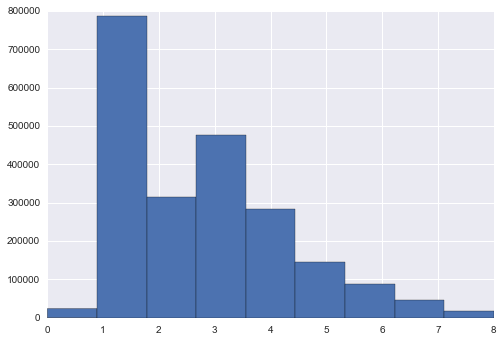

In [213]:
plt.hist(smallDF.ageGroup, bins = 9)
plt.show()

In [214]:
smallDF.ageGroup.value_counts().sort_index()

0     23969
1    785913
2    313839
3    477380
4    284633
5    144742
6     87628
7     46099
8     18176
Name: ageGroup, dtype: int64

The top two customer age groups are 20s and 40s. It will be interesting to see if there is any difference between these two groups.

If a customer lives in Spain, for simplicity, they are considered Spanish.

In [27]:
smallDF['isSpanish'] = smallDF.pais_residencia.map(lambda x: 1 if x == "ES" else 0)

In [216]:
smallDF.isSpanish.value_counts()

1    2172019
0      10360
Name: isSpanish, dtype: int64

Most customers live in Spain, over 99%.

If a customer lives in a Barcelona or Madrid, they are considered from a major city.

In [28]:
smallDF['majorCity'] = smallDF.nomprov.map(lambda x: 1 if x == "MADRID" or x == "BARCELONA" else 0)

In [218]:
smallDF.majorCity.value_counts()

0    1260869
1     921510
Name: majorCity, dtype: int64

The majority of customers live in Barcelona or Madrid, about 58%.

Extract the year and month from the date features, and set the lowest value to 0.

In [29]:
smallDF['fecha_alta_year'] = pd.DatetimeIndex(smallDF.fecha_alta).year - 1995
smallDF['fecha_dato_year'] = pd.DatetimeIndex(smallDF.fecha_dato).year - 2015

In [30]:
smallDF['fecha_alta_month'] = pd.DatetimeIndex(smallDF.fecha_alta).month - 1
smallDF['fecha_dato_month'] = pd.DatetimeIndex(smallDF.fecha_dato).month - 1

In [31]:
smallDF.antiguedad = smallDF.antiguedad.astype(int)

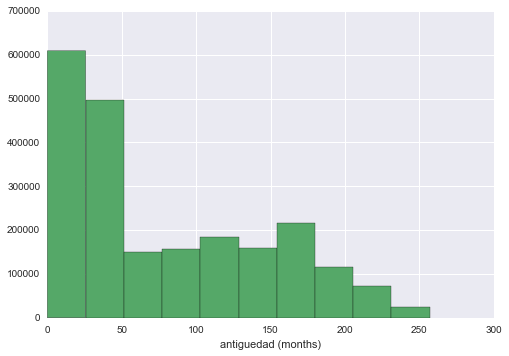

In [223]:
plt.hist(smallDF.antiguedad)
plt.xlabel("antiguedad (months)")
plt.show()

In [224]:
print min(smallDF.antiguedad)
print max(smallDF.antiguedad)

0
257


Group antiguedad by years.

In [32]:
smallDF['antiguedad_years'] = smallDF.antiguedad // 12

In [228]:
smallDF.ult_fec_cli_1t.value_counts()

2015-12-24    133
2015-12-28     73
2015-07-21     70
2015-07-09     67
2015-07-06     64
2015-07-07     51
2015-07-10     51
2015-07-24     51
2015-07-22     49
2015-07-01     48
2015-07-17     45
2015-07-03     45
2015-07-23     44
2015-07-20     44
2015-07-29     43
2015-07-15     43
2015-07-28     40
2015-07-27     36
2015-07-14     35
2015-07-30     34
2015-07-02     29
2015-07-13     29
2015-12-17     29
2015-12-21     28
2015-12-18     26
2015-12-16     26
2015-07-08     26
2016-01-05     25
2016-05-02     24
2015-07-16     24
             ... 
2016-04-22      8
06/28/16        8
2016-03-24      8
2016-04-26      7
2015-09-09      7
2016-05-09      7
2015-10-02      7
2015-08-19      6
2015-09-21      6
2015-12-23      6
2016-04-20      6
2015-08-26      6
2015-11-05      6
2016-03-03      6
2015-08-06      6
2015-11-26      5
2016-03-15      5
2016-01-04      5
2015-08-20      5
2016-03-07      5
2016-01-22      5
2015-08-14      5
06/29/16        5
2016-03-23      4
2015-08-21

Given the number of missing values, I'm going to create a new feature 'HAS_ult_fec_cli_1t' based on if we have a value for this feature or not.

In [34]:
smallDF['HAS_ult_fec_cli_1t'] = smallDF.ult_fec_cli_1t.map(lambda x: 1 if x > 0 else 0)

In [230]:
smallDF.HAS_ult_fec_cli_1t.value_counts()

0    2178359
1       4020
Name: HAS_ult_fec_cli_1t, dtype: int64

This looks good. Now we can drop ult_fec_cli_1t because we won't need it anymore.

In [35]:
smallDF = smallDF.drop('ult_fec_cli_1t', 1)

In [232]:
smallDF.renta.describe()

count    2.182379e+06
mean     1.270332e+05
std      2.044002e+05
min      1.202730e+03
25%      7.122996e+04
50%      9.798357e+04
75%      1.389655e+05
max      2.889440e+07
Name: renta, dtype: float64

Group customers by renta in $50,000 increments.

In [36]:
smallDF['rentaGroup'] = smallDF.renta // 50000

Since renta values become less dense after 1,000,000, we will group people with values between 1M and > 10M together, as well as those with values greater than or equal to $10M.

In [37]:
smallDF.loc[smallDF.renta >= 1000000, "rentaGroup"] = 20
smallDF.loc[smallDF.renta >= 10000000, "rentaGroup"] = 21

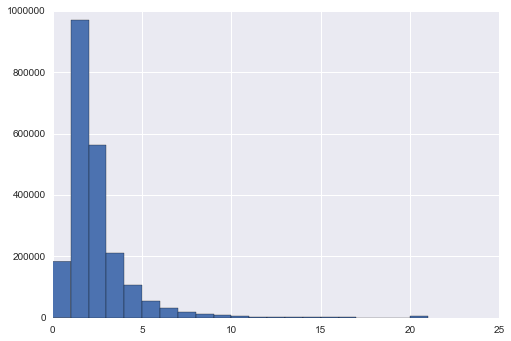

In [235]:
plt.hist(smallDF.rentaGroup, bins = 21)
plt.show()

In [236]:
smallDF.rentaGroup.value_counts().sort_index()

0.0     183826
1.0     969540
2.0     562775
3.0     210545
4.0     107850
5.0      54095
6.0      30817
7.0      19131
8.0      12525
9.0       8998
10.0      4764
11.0      3253
12.0      2396
13.0      1863
14.0      1427
15.0      1242
16.0      1026
17.0       739
18.0       729
19.0       574
20.0      4093
21.0       171
Name: rentaGroup, dtype: int64

In [237]:
list(smallDF.columns.values)

['age',
 'antiguedad',
 'canal_entrada',
 'conyuemp',
 'fecha_alta',
 'fecha_dato',
 'ind_actividad_cliente',
 'ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_empleado',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_nom_pens_ult1',
 'ind_nomina_ult1',
 'ind_nuevo',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_recibo_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'indext',
 'indfall',
 'indrel',
 'indrel_1mes',
 'indresi',
 'ncodpers',
 'nomprov',
 'pais_residencia',
 'renta',
 'segmento',
 'sexo',
 'tipodom',
 'tiprel_1mes',
 'ageGroup',
 'isSpanish',
 'majorCity',
 'fecha_alta_year',
 'fecha_dato_year',
 'fecha_alta_month',
 'fecha_dato_month',
 'antiguedad_years',
 'HAS_ult_fec_cli_1t',
 'ren

Okay, now that we have everything cleaned and new features have been created. We will repeat this process on the data that we want to model. 
You might be thinking, why not just clean and create the features on the data you want to model. It took a few iterations to choose the data I wanted to model and seperating these two steps simplified things. 

# Transform the Training Data

The data we will be modeling with are the rows in the dataset where a customer has added a new product since the previous month. For example, if the customer did not have a credit card in March 2015, but received one in April 2015, we will use the customer's April 2015 data as the training features, and the credit card (ind_tjcr_fin_ult1) as the target feature.

months is all of the months in the dataset.

In [38]:
months = train.fecha_dato.unique()

In [39]:
train_final = pd.DataFrame()

In [40]:
#Start with the second month because we need a previous month to compare data with.
i = 1
while i < len(months):
    #Subset all of the data of the new month, which will be compared to the previous month.
    train_new_month = train[train.fecha_dato == months[i]]
    train_previous_month = train[train.fecha_dato == months[i-1]]
    
    print("Original length of train1: ", len(train_new_month))
    print("Original length of train2: ", len(train_previous_month))
    print
    
    #Only select the customers who have data in each month.
    train_new_month = train_new_month.loc[train_new_month['ncodpers'].isin(train_previous_month.ncodpers)]
    train_previous_month = train_previous_month.loc[train_previous_month['ncodpers'].isin(train_new_month.ncodpers)]
    
    print("New length of train_new_month: ", len(train_new_month))
    print("New length of train_previous_month: ", len(train_previous_month))
    print
    
    #Sort by ncodpers (Customer code) to allow for easy subtraction between dataframes later.
    train_new_month.sort_values(by = 'ncodpers', inplace = True)
    train_previous_month.sort_values(by = 'ncodpers', inplace = True)
    
    #These are all of the target features.
    target_cols_all = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1',
                'ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1',
                'ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_dela_fin_ult1','ind_deme_fin_ult1',
                'ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_nom_pens_ult1',
                'ind_nomina_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1',
                'ind_recibo_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1']
    
    #Select only the target columns.
    train_new_month_targets = train_new_month[target_cols_all]
    #Add ncodpers to the dataframe.
    train_new_month_targets['ncodpers'] = train_new_month.ncodpers
    #Remove the index.
    train_new_month_targets.reset_index(drop = True, inplace = True)

    #Select only the target columns.
    train_previous_month_targets = train_previous_month[target_cols_all]
    #Add ncodpers to the dataframe.
    train_previous_month_targets['ncodpers'] = train_previous_month.ncodpers
    #Set ncodpers' values to 0, so that there is no effect to this feature when this dataframe is 
    #subtracted from train_new_month_targets.
    train_previous_month_targets.ncodpers = 0
    #Remove the index.
    train_previous_month_targets.reset_index(drop = True, inplace = True)
    
    #Subtract the previous month from the current to find which new products the customers have.
    train_new_products = train_new_month_targets.subtract(train_previous_month_targets)
    #Values will be negative if the customer no longer has a product that they once did. 
    #Set these negative values to 0.
    train_new_products[train_new_products < 0] = 0
    print("Quantity of features to use:")
    #Sum columns to learn about the quantity of the types of new products.
    print train_new_products.sum(axis = 0)
    
    train_new_products = train_new_products.fillna(0)
    
    #Merge the target features with the data we will use to train the model.
    train_new_products = train_new_products.merge(train_new_month.ix[:,0:24], on = 'ncodpers')
    
    #Add each month's data to the same dataframe.
    train_final = pd.concat([train_final,train_new_products], axis = 0)
    
    print("Length of new dataframe:", len(train_final))
    print
    percent_finished = float(i/len(months))
    print("Percent finished:", percent_finished)
    
    i += 1

('Original length of train1: ', 627394)
('Original length of train2: ', 625457)

('New length of train_new_month: ', 622926)
('New length of train_previous_month: ', 622926)



/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Quantity of features to use:
ind_ahor_fin_ult1    1.000000e+00
ind_aval_fin_ult1    1.000000e+00
ind_cco_fin_ult1     2.132000e+03
ind_cder_fin_ult1    1.200000e+01
ind_cno_fin_ult1     1.884000e+03
ind_ctju_fin_ult1    7.000000e+00
ind_ctma_fin_ult1    2.910000e+02
ind_ctop_fin_ult1    2.490000e+02
ind_ctpp_fin_ult1    1.710000e+02
ind_deco_fin_ult1    3.480000e+02
ind_dela_fin_ult1    7.240000e+02
ind_deme_fin_ult1    3.300000e+01
ind_ecue_fin_ult1    1.472000e+03
ind_fond_fin_ult1    4.510000e+02
ind_hip_fin_ult1     5.000000e+00
ind_nom_pens_ult1    5.656000e+03
ind_nomina_ult1      5.659000e+03
ind_plan_fin_ult1    2.700000e+01
ind_pres_fin_ult1    9.000000e+00
ind_reca_fin_ult1    2.170000e+02
ind_recibo_ult1      8.285000e+03
ind_tjcr_fin_ult1    3.471000e+03
ind_valo_fin_ult1    2.590000e+02
ind_viv_fin_ult1     8.000000e+00
ncodpers             4.831139e+11
dtype: float64
('Length of new dataframe:', 622926)

('Percent finished:', 0)
('Original length of train1: ', 629209)
('O

In [241]:
train_final.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_dela_fin_ult1,ind_deme_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_nom_pens_ult1,ind_nomina_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_recibo_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ncodpers,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,15889,2015-02-28,F,ES,V,56,1995-01-16,0.0,245,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,326124.90,01 - TOP
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,15890,2015-02-28,A,ES,V,62,1995-01-16,0.0,246,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,71461.20,02 - PARTICULARES
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,15892,2015-02-28,F,ES,H,61,1995-01-16,0.0,246,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,430477.41,01 - TOP
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,15893,2015-02-28,N,ES,V,62,1997-10-03,0.0,246,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,430477.41,02 - PARTICULARES
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,15894,2015-02-28,A,ES,V,59,1995-01-16,0.0,246,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,281757.72,01 - TOP


Only select the rows in the dataframe where there is a new product, i.e. where at least one target feature has a value of 1.

In [41]:
train_final = train_final.loc[(train_final.ix[:,0:24] != 0).any(axis=1)]

In [42]:
len(train_final)

446511

We need the data from May 2016 because we are only interested in building a model about which new products customers will have in June 2016. Therefore, we need to compare the model's prediction of reccommended products, versus the products the customer already has. 

In [43]:
final_month = train[train.fecha_dato == '2016-05-28']

In [44]:
len(final_month)

931453

Join the training and testing data to reduce repetitive code.

In [45]:
df = pd.concat([train_final,test], axis = 0, ignore_index = True)

In [46]:
df.isnull().sum()

age                            0
antiguedad                     0
canal_entrada               2847
cod_prov                    5740
conyuemp                 1375888
fecha_alta                   489
fecha_dato                     0
ind_actividad_cliente        489
ind_ahor_fin_ult1         929615
ind_aval_fin_ult1         929615
ind_cco_fin_ult1          929615
ind_cder_fin_ult1         929615
ind_cno_fin_ult1          929615
ind_ctju_fin_ult1         929615
ind_ctma_fin_ult1         929615
ind_ctop_fin_ult1         929615
ind_ctpp_fin_ult1         929615
ind_deco_fin_ult1         929615
ind_dela_fin_ult1         929615
ind_deme_fin_ult1         929615
ind_ecue_fin_ult1         929615
ind_empleado                 489
ind_fond_fin_ult1         929615
ind_hip_fin_ult1          929615
ind_nom_pens_ult1         929615
ind_nomina_ult1           929615
ind_nuevo                    489
ind_plan_fin_ult1         929615
ind_pres_fin_ult1         929615
ind_reca_fin_ult1         929615
ind_recibo

In [47]:
#Clean the data - we will follow the same steps as the 'smallDF'.
print("Step 1/13")
badRows = df[df.ind_empleado.isnull()].index

print("Step 2/13")
df = df.drop(badRows, axis = 0)

print("Step 3/13")
df.canal_entrada = df.canal_entrada.fillna("Unknown")

print("Step 4/13")
df = df.drop("cod_prov", 1)

print("Step 5/13")
df.conyuemp = df.conyuemp.fillna("Unknown")

print("Step 6/13")
df.loc[df.indrel_1mes == '1', 'indrel_1mes'] = 'Primary'
df.loc[df.indrel_1mes == '1.0', 'indrel_1mes'] = 'Primary'
df.loc[df.indrel_1mes == 1, 'indrel_1mes'] = 'Primary'
df.loc[df.indrel_1mes == 1.0, 'indrel_1mes'] = 'Primary'
df.loc[df.indrel_1mes == '2', 'indrel_1mes'] = 'Co-owner'
df.loc[df.indrel_1mes == '2.0', 'indrel_1mes'] = 'Co-owner'
df.loc[df.indrel_1mes == 2, 'indrel_1mes'] = 'Co-owner'
df.loc[df.indrel_1mes == 2.0, 'indrel_1mes'] = 'Co-owner'
df.loc[df.indrel_1mes == '3', 'indrel_1mes'] = 'Former Primary'
df.loc[df.indrel_1mes == '3.0', 'indrel_1mes'] = 'Former Primary'
df.loc[df.indrel_1mes == 3, 'indrel_1mes'] = 'Former Primary'
df.loc[df.indrel_1mes == 3.0, 'indrel_1mes'] = 'Former Primary'
df.loc[df.indrel_1mes == '4', 'indrel_1mes'] = 'Former Co-owner'
df.loc[df.indrel_1mes == '4.0', 'indrel_1mes'] = 'Former Co-owner'
df.loc[df.indrel_1mes == 4, 'indrel_1mes'] = 'Former Co-owner'
df.loc[df.indrel_1mes == 4.0, 'indrel_1mes'] = 'Former Co-owner'

df.indrel_1mes = df.indrel_1mes.fillna('Primary')

print("Step 7/13")
df.nomprov = df.nomprov.fillna("MADRID")

print("Step 8/13")
df.loc[df.renta == '         NA',"renta"] = 0
df.renta = df.renta.astype(float)
df.loc[df.renta == 0, 'renta'] = df[df.renta > 0].groupby('nomprov').renta.transform('median')
df.loc[df.renta.isnull(), "renta"] = df.groupby('nomprov').renta.transform('median')

print("Step 9/13")
df.segmento = df[df.renta <= 98000].segmento.fillna("03 - UNIVERSITARIO")
df.segmento = df[df.renta <= 125500].segmento.fillna("02 - PARTICULARES")
df.segmento = df.segmento.fillna("01 - TOP")

print("Step 10/13")
df.sexo = df.sexo.fillna("V")

print("Step 11/13")
df.tiprel_1mes = df.tiprel_1mes.fillna('I')

print("Step 12/13")
df.ind_nomina_ult1 = df.ind_nomina_ult1.fillna(0.0)
df.ind_nom_pens_ult1 = df.ind_nom_pens_ult1.fillna(0.0)

print("Step 13/13")
df.loc[df.antiguedad == -999999, 'antiguedad'] = df[df.antiguedad >= 0].antiguedad.median()

Step 1/13
Step 2/13
Step 3/13
Step 4/13
Step 5/13
Step 6/13
Step 7/13
Step 8/13
Step 9/13
Step 10/13
Step 11/13
Step 12/13
Step 13/13


In [48]:
#Feature Engineering - follow the same steps as 'smallDF'.
print("Step 1/10")
df.age = df.age.astype(int)
df.loc[df.age < 20,"age"] = 19
df.loc[df.age > 90,"age"] = 91

print("Step 2/10")
df['ageGroup'] = (df.age // 10) - 1

print("Step 3/10")
df['isSpanish'] = df.pais_residencia.map(lambda x: 1 if x == "ES" else 0)

print("Step 4/10")
df['majorCity'] = df.nomprov.map(lambda x: 1 if x == "MADRID" or x == "BARCELONA" else 0)

print("Step 5/10")
df['fecha_alta_year'] = pd.DatetimeIndex(df.fecha_alta).year - 1995
df['fecha_dato_year'] = pd.DatetimeIndex(df.fecha_dato).year - 2015
df['fecha_alta_month'] = pd.DatetimeIndex(df.fecha_alta).month - 1
df['fecha_dato_month'] = pd.DatetimeIndex(df.fecha_dato).month - 1

print("Step 6/10")
df.antiguedad = df.antiguedad.astype(int)
df['antiguedad_years'] = df.antiguedad // 12

print("Step 7/10")
df.loc[df.indrel == 99.0, "indrel"] = 0.0

print("Step 8/10")
df['HAS_ult_fec_cli_1t'] = df.ult_fec_cli_1t.map(lambda x: 1 if x > 0 else 0)

print("Step 9/10")
df = df.drop('ult_fec_cli_1t', 1)

print("Step 10/10")
df['rentaGroup'] = df.renta.astype(float) // 50000
df.loc[df.renta >= 1000000, "rentaGroup"] = 20
df.loc[df.renta >= 10000000, "rentaGroup"] = 21

Step 1/10
Step 2/10
Step 3/10
Step 4/10
Step 5/10
Step 6/10
Step 7/10
Step 8/10
Step 9/10
Step 10/10


Since we removed the 'badRows' from the data, we need to find the new length of the dataframe.

In [49]:
train_final_length = len(train_final) - len(badRows)

In [50]:
train_final, test = df[:train_final_length], df[train_final_length:] 

In [51]:
print len(train_final)
print len(test)

446022
929615


The length looks good there.

Seperate the training columns from the dataframe as different transformations will be performed on these features, compared to the target columns.

In [52]:
train_final_training_cols = train_final
train_final_training_cols = train_final_training_cols.drop(target_cols_all, axis=1)
test = test.drop(target_cols_all, axis=1)

In [53]:
df = pd.concat([train_final_training_cols, test], axis = 0)

Some features need to be converted to integers with cat.codes. Some of these will then have dummy variables created from them, however features such as pais_residencia will not, because too many features would be created (there are over 100 countries in this dataset).

In [54]:
print("Step 1/6")
df.pais_residencia = df.pais_residencia.astype('category').cat.codes
print("Step 2/6")
df.canal_entrada = df.canal_entrada.astype('category').cat.codes
print("Step 3/6")
df.nomprov = df.nomprov.astype('category').cat.codes
print("Step 4/6")
final_month.nomprov = final_month.indrel_1mes.astype('category').cat.codes
print("Step 5/6")
df = pd.get_dummies(df, columns = ['ind_empleado','sexo','tiprel_1mes','indresi',
                                   'indext','conyuemp','indfall','segmento','indrel_1mes'])
print("Step 6/6")
#Drop the date features because we can't use them to train the model.
df = df.drop(['fecha_dato', 'fecha_alta'], axis = 1)

Step 1/6
Step 2/6
Step 3/6
Step 4/6
Step 5/6
Step 6/6


In [55]:
train_final_training_cols, test = df[:train_final_length], df[train_final_length:] 

In [56]:
print("Step 1/11")
#Get the target columns
labels = train_final[target_cols_all]

print("Step 2/11")
#Add ncodpers to the dataframe
labels['ncodpers'] = train_final.ncodpers

print("Step 3/11")
labels = labels.set_index("ncodpers")

print("Step 4/11")
stacked_labels = labels.stack()

print("Step 5/11")
filtered_labels = stacked_labels.reset_index()

print("Step 6/11")
filtered_labels.columns = ["ncodpers", "product", "newly_added"]

print("Step 7/11")
#Only select the rows where there are a new product.
filtered_labels = filtered_labels[filtered_labels["newly_added"] == 1]

print("Step 8/11")
#Merge with the training features.
multiclass_train = filtered_labels.merge(train_final_training_cols, on="ncodpers", how="left")

print("Step 9/11")
train_final = multiclass_train.drop_duplicates(multiclass_train, keep='last')

print("Step 10/11")
labels_final = train_final['product']

print("Step 11/11")
train_final_ncodpers = train_final.ncodpers
#Remove the columns that are not needed to train the model.
train_final = train_final.drop(['ncodpers','newly_added','product'], axis = 1)

Step 1/11
Step 2/11
Step 3/11
Step 4/11


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Step 5/11
Step 6/11
Step 7/11
Step 8/11
Step 9/11
Step 10/11
Step 11/11


Below we will perform similar, but not identical, tranformations to the 'final_month' dataframe.

In [57]:
#Clean the data
print("Step 1/13")
badRows = final_month[final_month.ind_empleado.isnull()].index

print("Step 2/13")
final_month = final_month.drop(badRows, axis = 0)

print("Step 3/13")
final_month.canal_entrada = final_month.canal_entrada.fillna("Unknown")

print("Step 4/13")
final_month = final_month.drop("cod_prov", 1)

print("Step 5/13")
final_month.conyuemp = final_month.conyuemp.fillna("Unknown")

print("Step 6/13")
final_month.loc[final_month.indrel_1mes == '1', 'indrel_1mes'] = 'Primary'
final_month.loc[final_month.indrel_1mes == '1.0', 'indrel_1mes'] = 'Primary'
final_month.loc[final_month.indrel_1mes == 1, 'indrel_1mes'] = 'Primary'
final_month.loc[final_month.indrel_1mes == 1.0, 'indrel_1mes'] = 'Primary'
final_month.loc[final_month.indrel_1mes == '2', 'indrel_1mes'] = 'Co-owner'
final_month.loc[final_month.indrel_1mes == '2.0', 'indrel_1mes'] = 'Co-owner'
final_month.loc[final_month.indrel_1mes == 2, 'indrel_1mes'] = 'Co-owner'
final_month.loc[final_month.indrel_1mes == 2.0, 'indrel_1mes'] = 'Co-owner'
final_month.loc[final_month.indrel_1mes == '3', 'indrel_1mes'] = 'Former Primary'
final_month.loc[final_month.indrel_1mes == '3.0', 'indrel_1mes'] = 'Former Primary'
final_month.loc[final_month.indrel_1mes == 3, 'indrel_1mes'] = 'Former Primary'
final_month.loc[final_month.indrel_1mes == 3.0, 'indrel_1mes'] = 'Former Primary'
final_month.loc[final_month.indrel_1mes == '4', 'indrel_1mes'] = 'Former Co-owner'
final_month.loc[final_month.indrel_1mes == '4.0', 'indrel_1mes'] = 'Former Co-owner'
final_month.loc[final_month.indrel_1mes == 4, 'indrel_1mes'] = 'Former Co-owner'
final_month.loc[final_month.indrel_1mes == 4.0, 'indrel_1mes'] = 'Former Co-owner'

final_month.indrel_1mes = final_month.indrel_1mes.fillna('Primary')

print("Step 7/13")
final_month.nomprov = final_month.nomprov.fillna("MADRID")

print("Step 8/13")
final_month.renta = final_month.renta.astype(float)
final_month.loc[final_month.renta.isnull(), "renta"] = final_month.groupby('nomprov').renta.transform('median')

print("Step 9/13")
final_month.segmento = final_month[final_month.renta <= 98000].segmento.fillna("03 - UNIVERSITARIO")
final_month.segmento = final_month[final_month.renta <= 125500].segmento.fillna("02 - PARTICULARES")
final_month.segmento = final_month.segmento.fillna("01 - TOP")

print("Step 10/13")
final_month.sexo = final_month.sexo.fillna("V")

print("Step 11/13")
final_month.tiprel_1mes = final_month.tiprel_1mes.fillna('I')

print("Step 12/13")
final_month.ind_nomina_ult1 = final_month.ind_nomina_ult1.fillna(0.0)
final_month.ind_nom_pens_ult1 = final_month.ind_nom_pens_ult1.fillna(0.0)

print("Step 13/13")
final_month.loc[final_month.antiguedad == -999999, 'antiguedad'] = final_month[final_month.antiguedad >= 0].antiguedad.median()

#Feature Engineering

print("Step 1/10")
final_month.age = final_month.age.astype(int)
final_month.loc[final_month.age < 20,"age"] = 19
final_month.loc[final_month.age > 90,"age"] = 91

print("Step 2/10")
final_month['ageGroup'] = (final_month.age // 10) - 1

print("Step 3/10")
final_month['isSpanish'] = final_month.pais_residencia.map(lambda x: 1 if x == "ES" else 0)

print("Step 4/10")
final_month['majorCity'] = final_month.nomprov.map(lambda x: 1 if x == "MADRID" or x == "BARCELONA" else 0)

print("Step 5/10")
final_month['fecha_alta_year'] = pd.DatetimeIndex(final_month.fecha_alta).year - 1995
final_month['fecha_dato_year'] = pd.DatetimeIndex(final_month.fecha_dato).year - 2015
final_month['fecha_alta_month'] = pd.DatetimeIndex(final_month.fecha_alta).month - 1
final_month['fecha_dato_month'] = pd.DatetimeIndex(final_month.fecha_dato).month - 1

print("Step 6/10")
final_month.antiguedad = final_month.antiguedad.astype(int)
final_month['antiguedad_years'] = final_month.antiguedad // 12

print("Step 7/10")
final_month.loc[final_month.indrel == 99.0, "indrel"] = 0.0

print("Step 8/10")
final_month['HAS_ult_fec_cli_1t'] = final_month.ult_fec_cli_1t.map(lambda x: 1 if x > 0 else 0)

print("Step 9/10")
final_month = final_month.drop('ult_fec_cli_1t', 1)

print("Step 10/10")
final_month['rentaGroup'] = final_month.renta.astype(float) // 50000
final_month.loc[final_month.renta >= 1000000, "rentaGroup"] = 20
final_month.loc[final_month.renta >= 10000000, "rentaGroup"] = 21


final_month_training_cols = final_month
final_month_training_cols = final_month_training_cols.drop(target_cols_all, axis=1)


print("Step 1/6")
final_month.pais_residencia = final_month.pais_residencia.astype('category').cat.codes
print("Step 2/6")
final_month.canal_entrada = final_month.canal_entrada.astype('category').cat.codes
print("Step 3/6")
final_month.nomprov = final_month.nomprov.astype('category').cat.codes
print("Step 4/6")
final_month.nomprov = final_month.indrel_1mes.astype('category').cat.codes
print("Step 5/6")
final_month = pd.get_dummies(final_month, columns = ['ind_empleado','sexo','tiprel_1mes','indresi',
                                   'indext','conyuemp','indfall','segmento','indrel_1mes'])
print("Step 6/6")
final_month = final_month.drop(['fecha_dato', 'fecha_alta'], axis = 1)



print("Step 1/11")
#Get the target columns
labels_final_month = final_month[target_cols_all]

print("Step 2/11")
#Add ncodpers to the dataframe
labels_final_month['ncodpers'] = final_month.ncodpers

print("Step 3/11")
labels_final_month = labels_final_month.set_index("ncodpers")

print("Step 4/11")
stacked_labels_final_month = labels_final_month.stack()

print("Step 5/11")
filtered_labels_final_month = stacked_labels_final_month.reset_index()

print("Step 6/11")
filtered_labels_final_month.columns = ["ncodpers", "product", "newly_added"]

print("Step 7/11")
#Only select the rows where there is a new product.
filtered_labels_final_month = filtered_labels_final_month[filtered_labels_final_month["newly_added"] == 1]

print("Step 8/11")
#Merge with the training features.
multiclass_final_month = filtered_labels_final_month.merge(final_month_training_cols, on="ncodpers", how="left")

print("Step 9/11")
final_month = multiclass_final_month.drop_duplicates(multiclass_final_month, keep='last')

print("Step 10/11")
labels_final_month_final = final_month['product']

print("Step 11/11")
final_month_ncodpers = final_month.ncodpers
#Remove the columns that are not needed to train the model.
final_month = final_month.drop(['ncodpers','newly_added','product'], axis = 1)

Step 1/13
Step 2/13
Step 3/13
Step 4/13
Step 5/13
Step 6/13
Step 7/13
Step 8/13
Step 9/13
Step 10/13
Step 11/13
Step 12/13
Step 13/13
Step 1/10
Step 2/10
Step 3/10
Step 4/10
Step 5/10
Step 6/10
Step 7/10
Step 8/10
Step 9/10
Step 10/10
Step 1/6
Step 2/6
Step 3/6
Step 4/6
Step 5/6
Step 6/6
Step 1/11
Step 2/11
Step 3/11


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Step 4/11
Step 5/11
Step 6/11
Step 7/11
Step 8/11
Step 9/11
Step 10/11
Step 11/11


Let's take a look at the length of our dataframes to help ensure that everything is still in order.

In [58]:
print len(train_final)
print len(labels_final)
print len(final_month)
print len(labels_final_month_final)

1020853
1020853
1240538
1240538


Yup, everything is still looking good!

Let's see what labels we are looking to train with.

In [274]:
labels_final.value_counts()

ind_recibo_ult1      225500
ind_nom_pens_ult1    152456
ind_nomina_ult1      136051
ind_cco_fin_ult1     123302
ind_tjcr_fin_ult1    116274
ind_cno_fin_ult1      94198
ind_ecue_fin_ult1     59774
ind_dela_fin_ult1     26055
ind_reca_fin_ult1     24505
ind_ctma_fin_ult1     15895
ind_valo_fin_ult1     12308
ind_ctop_fin_ult1      8864
ind_fond_fin_ult1      8788
ind_ctpp_fin_ult1      6465
ind_deco_fin_ult1      6343
ind_plan_fin_ult1      1802
ind_deme_fin_ult1       603
ind_ctju_fin_ult1       521
ind_pres_fin_ult1       406
ind_cder_fin_ult1       344
ind_hip_fin_ult1        199
ind_viv_fin_ult1        191
ind_aval_fin_ult1         6
ind_ahor_fin_ult1         3
Name: product, dtype: int64

# Build the Model

Convert the values of labels_final to integers so that it can be used by xgboost.

In [59]:
labels_final = labels_final.astype('category').cat.codes

Check to make sure we have the same features in train_final and test.

In [60]:
print len(train_final.columns)
print len(test.columns)

45
46


Nope, we have an extra one, let's find it!

In [61]:
print train_final.columns
print
print test.columns

Index([u'age', u'antiguedad', u'canal_entrada', u'ind_actividad_cliente',
       u'ind_nuevo', u'indrel', u'nomprov', u'pais_residencia', u'renta',
       u'tipodom', u'ageGroup', u'isSpanish', u'majorCity', u'fecha_alta_year',
       u'fecha_dato_year', u'fecha_alta_month', u'fecha_dato_month',
       u'antiguedad_years', u'HAS_ult_fec_cli_1t', u'rentaGroup',
       u'ind_empleado_A', u'ind_empleado_B', u'ind_empleado_F',
       u'ind_empleado_N', u'ind_empleado_S', u'sexo_H', u'sexo_V',
       u'tiprel_1mes_A', u'tiprel_1mes_I', u'tiprel_1mes_P', u'indresi_N',
       u'indresi_S', u'indext_N', u'indext_S', u'conyuemp_N', u'conyuemp_S',
       u'conyuemp_Unknown', u'indfall_N', u'indfall_S', u'segmento_01 - TOP',
       u'segmento_02 - PARTICULARES', u'segmento_03 - UNIVERSITARIO',
       u'indrel_1mes_Co-owner', u'indrel_1mes_Former Primary',
       u'indrel_1mes_Primary'],
      dtype='object')

Index([u'age', u'antiguedad', u'canal_entrada', u'ind_actividad_cliente',
       u'ind_n

It's 'ncodpers', we'll have to drop it.

In [62]:
test = test.drop('ncodpers', axis = 1)

The features below are dropped because I have already ran the model once and learned that these features are not useful.

In [63]:
train_final = train_final.drop(['tipodom','HAS_ult_fec_cli_1t','ind_empleado_S','indresi_N','indresi_S', 
                                'conyuemp_S','conyuemp_Unknown','indfall_S','indrel_1mes_Co-owner', 
                                'indrel_1mes_Former Primary','indrel_1mes_Primary'],
                               axis = 1)

test = test.drop(['tipodom','HAS_ult_fec_cli_1t','ind_empleado_S','indresi_N','indresi_S', 
                  'conyuemp_S','conyuemp_Unknown','indfall_S','indrel_1mes_Co-owner', 
                  'indrel_1mes_Former Primary','indrel_1mes_Primary'],
                  axis = 1)

Although I am splitting the data here, I used all of the train_final data for my submission in the Kaggle competition.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(train_final, labels_final, test_size=0.2, random_state=2)

Convert the data into matrices so that they can be used by xgboost.

In [65]:
import warnings
warnings.filterwarnings("ignore")

xgtrain = xgb.DMatrix(X_train, label = y_train)
xgtest = xgb.DMatrix(X_test, label = y_test)
watchlist = [(xgtrain, 'train'), (xgtest, 'eval')] 

In [66]:
random_state = 4
params = {
        'eta': 0.05,
        'max_depth': 6,
        'min_child_weight': 4,
        'subsample': 0.9,
        'colsample_bytree': 0.9,
        'gamma': 0,
        'alpha': 0,
        'lambda': 1,
        'verbose_eval': True,
        'seed': random_state,
        'num_class': 24,
        'objective': "multi:softprob",
        'eval_metric': 'mlogloss'
    }

''' 
BEST PARAMETERS
params = {
        'eta': 0.05,
        'max_depth': 6,
        'min_child_weight': 4,
        'subsample': 0.9,
        'colsample_bytree': 0.9,
        'gamma': 0,
        'alpha': 0,
        'lambda': 1,
        'verbose_eval': True,
        'seed': random_state,
        'num_class': 16,
        'objective': "multi:softprob",
        'eval_metric': 'mlogloss'
    }
lowest mlogloss: 1.81136, iterations: 143
'''

' \nBEST PARAMETERS\nparams = {\n        \'eta\': 0.05,\n        \'max_depth\': 6,\n        \'min_child_weight\': 4,\n        \'subsample\': 0.9,\n        \'colsample_bytree\': 0.9,\n        \'gamma\': 0,\n        \'alpha\': 0,\n        \'lambda\': 1,\n        \'verbose_eval\': True,\n        \'seed\': random_state,\n        \'num_class\': 16,\n        \'objective\': "multi:softprob",\n        \'eval_metric\': \'mlogloss\'\n    }\nlowest mlogloss: 1.81136, iterations: 143\n'

Train the model!

In [88]:
iterations = 40
printN = 1
#early_stopping_rounds = 10

xgbModel = xgb.train(params, 
                      xgtrain, 
                      iterations, 
                      watchlist,
                      verbose_eval = printN
                      #early_stopping_rounds=early_stopping_rounds
                      )

[0]	train-mlogloss:3.10744	eval-mlogloss:3.1077
[1]	train-mlogloss:3.04601	eval-mlogloss:3.04652
[2]	train-mlogloss:2.99106	eval-mlogloss:2.99179
[3]	train-mlogloss:2.94154	eval-mlogloss:2.94251
[4]	train-mlogloss:2.89657	eval-mlogloss:2.89775
[5]	train-mlogloss:2.85525	eval-mlogloss:2.85666
[6]	train-mlogloss:2.81717	eval-mlogloss:2.81878
[7]	train-mlogloss:2.78199	eval-mlogloss:2.78378
[8]	train-mlogloss:2.74929	eval-mlogloss:2.75127
[9]	train-mlogloss:2.71878	eval-mlogloss:2.72093
[10]	train-mlogloss:2.69021	eval-mlogloss:2.69254
[11]	train-mlogloss:2.66343	eval-mlogloss:2.66596
[12]	train-mlogloss:2.63825	eval-mlogloss:2.64094
[13]	train-mlogloss:2.61454	eval-mlogloss:2.61742
[14]	train-mlogloss:2.59216	eval-mlogloss:2.5952
[15]	train-mlogloss:2.57101	eval-mlogloss:2.57422
[16]	train-mlogloss:2.55096	eval-mlogloss:2.55432
[17]	train-mlogloss:2.53199	eval-mlogloss:2.53551
[18]	train-mlogloss:2.51398	eval-mlogloss:2.51766
[19]	train-mlogloss:2.49681	eval-mlogloss:2.50064
[20]	train-m

Use f-score to find the most/least important features. This allowed us to know which features we could remove.

In [90]:
import operator
importance = xgbModel.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))
print importance
print len(importance)

[('tiprel_1mes_P', 12), ('conyuemp_N', 17), ('indrel', 26), ('isSpanish', 44), ('ind_empleado_F', 48), ('indfall_N', 55), ('ind_empleado_B', 56), ('ind_empleado_N', 59), ('indext_S', 75), ('pais_residencia', 89), ('ind_nuevo', 100), ('ind_empleado_A', 104), ('sexo_V', 124), ('segmento_03 - UNIVERSITARIO', 232), ('rentaGroup', 258), ('tiprel_1mes_I', 302), ('antiguedad_years', 317), ('segmento_02 - PARTICULARES', 434), ('ageGroup', 495), ('indext_N', 527), ('segmento_01 - TOP', 587), ('majorCity', 608), ('fecha_dato_year', 655), ('tiprel_1mes_A', 693), ('sexo_H', 891), ('ind_actividad_cliente', 1007), ('fecha_alta_month', 2155), ('nomprov', 2239), ('fecha_alta_year', 2390), ('fecha_dato_month', 2499), ('canal_entrada', 3058), ('antiguedad', 5088), ('age', 6089), ('renta', 6234)]
34


Convert labels to integers so that we can use them to find which products customers already have, and thus, do not need to be included in the final prediction.

In [91]:
labels_final_month_final_cat = labels_final_month_final.astype('category').cat.codes

used_products are the products that the customers have already used...duh.

In [74]:
used_products = pd.DataFrame()
used_products['product'] = labels_final_month_final_cat
used_products['ncodpers'] = final_month_ncodpers
used_products = used_products.drop_duplicates(keep = 'last')

In [75]:
#create a dictionary to store each product a customer already has
used_recommendation_products = {}
target_cols_all = np.array(target_cols_all)
#iterate through used_products and add each one to used_recommendation_products
for idx,row_val in used_products.iterrows():
    used_recommendation_products.setdefault(row_val['ncodpers'],[]).append(target_cols_all[row_val['product']])
    if len(used_recommendation_products) % 100000 == 0:
        print len(used_recommendation_products)

100000
200000
300000
300000
400000
500000
600000
600000
600000
600000
600000
600000


In [77]:
len(used_recommendation_products)

696539

Let's take a look at a customer's used_recommendation_products to see if everything looks alright.

In [78]:
used_recommendation_products[15889]

['ind_cco_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1']

Looks good!

Use our model to make the predictions

In [92]:
xgbtest = xgb.DMatrix(test)
XGBpreds = xgbModel.predict(xgbtest)

Let's take a peek at these predictions

In [93]:
XGBpreds

array([[ 0.01378124,  0.01378267,  0.07764912, ...,  0.14549424,
         0.03236732,  0.01398927],
       [ 0.01377054,  0.01377197,  0.30362314, ...,  0.02878234,
         0.01547578,  0.01379019],
       [ 0.01290242,  0.01290376,  0.1358742 , ...,  0.0216466 ,
         0.01477843,  0.01292084],
       ..., 
       [ 0.01413404,  0.01413551,  0.07362488, ...,  0.14337835,
         0.02360014,  0.01433361],
       [ 0.01248849,  0.01248979,  0.28581837, ...,  0.03890685,
         0.02114886,  0.01375181],
       [ 0.01242055,  0.01242184,  0.16417305, ...,  0.04265768,
         0.02102165,  0.01259887]], dtype=float32)

Sort the predictions, then reverse the order so that they are ranked from most likely to least.

In [94]:
pred = np.argsort(XGBpreds, axis=1)
pred = np.fliplr(pred) 

In [95]:
pred[0]

array([21, 20, 15, 16,  2,  4, 12, 19,  7, 22, 10,  6, 13,  3,  8, 17, 11,
       18, 14, 23,  9,  1,  0,  5])

Things look good here because the highest reccommended products are the most common in the training labels.

In [96]:
#test_ids are the customer codes for the testing data.
test_ids = np.array(pd.read_csv("/Users/Dave/Desktop/Programming/Personal Projects/Santander-Kaggle/test.csv",usecols=['ncodpers'])['ncodpers'])
target_cols_all = np.array(target_cols_all)
final_preds = []
#iterate through our model's predictions (pred) and add the 7 most recommended products that the customer does not have.
for idx,predicted in enumerate(pred):
    ids = test_ids[idx]
    top_product = target_cols_all[predicted]
    used_products = used_recommendation_products.get(ids,[])
    new_top_product = []
    for product in top_product:
        if product not in used_products:
            new_top_product.append(product)
        if len(new_top_product) == 7:
            break
    final_preds.append(' '.join(new_top_product))
    if len(final_preds) % 100000 == 0:
        print len(final_preds)

100000
200000
300000
400000
500000
600000
700000
800000
900000


Let's take a peek at the final predictions

In [97]:
final_preds

['ind_recibo_ult1 ind_nom_pens_ult1 ind_nomina_ult1 ind_cno_fin_ult1 ind_ecue_fin_ult1 ind_reca_fin_ult1 ind_ctop_fin_ult1',
 'ind_recibo_ult1 ind_cno_fin_ult1 ind_nom_pens_ult1 ind_nomina_ult1 ind_ecue_fin_ult1 ind_reca_fin_ult1 ind_tjcr_fin_ult1',
 'ind_recibo_ult1 ind_nom_pens_ult1 ind_nomina_ult1 ind_cno_fin_ult1 ind_tjcr_fin_ult1 ind_reca_fin_ult1 ind_ecue_fin_ult1',
 'ind_recibo_ult1 ind_cno_fin_ult1 ind_nom_pens_ult1 ind_nomina_ult1 ind_reca_fin_ult1 ind_ecue_fin_ult1 ind_dela_fin_ult1',
 'ind_recibo_ult1 ind_cno_fin_ult1 ind_nom_pens_ult1 ind_nomina_ult1 ind_reca_fin_ult1 ind_ecue_fin_ult1 ind_dela_fin_ult1',
 'ind_recibo_ult1 ind_cno_fin_ult1 ind_nomina_ult1 ind_nom_pens_ult1 ind_reca_fin_ult1 ind_ecue_fin_ult1 ind_valo_fin_ult1',
 'ind_nom_pens_ult1 ind_tjcr_fin_ult1 ind_nomina_ult1 ind_cno_fin_ult1 ind_ecue_fin_ult1 ind_reca_fin_ult1 ind_dela_fin_ult1',
 'ind_recibo_ult1 ind_cno_fin_ult1 ind_nomina_ult1 ind_nom_pens_ult1 ind_reca_fin_ult1 ind_ecue_fin_ult1 ind_tjcr_fin_ult1'

final_preds is looking good because the most common products in the training labels are appearing often.

Let's make our submission to Kaggle by combining the customer codes (ncodpers) with our predictions

In [98]:
submission = pd.DataFrame({'ncodpers':test_ids,'added_products':final_preds})
submission.to_csv('/Users/Dave/Desktop/Programming/Personal Projects/Santander-Kaggle/submission.csv',index=False)

Let's check our submission to see if everything looks alright.

In [511]:
submission.head(10)

,added_products,ncodpers
0,ind_recibo_ult1 ind_nom_pens_ult1 ind_nomina_u...,15889
1,ind_recibo_ult1 ind_cno_fin_ult1 ind_nom_pens_...,1170544
2,ind_recibo_ult1 ind_nom_pens_ult1 ind_nomina_u...,1170545
3,ind_nom_pens_ult1 ind_recibo_ult1 ind_cno_fin_...,1170547
4,ind_recibo_ult1 ind_nom_pens_ult1 ind_nomina_u...,1170548
5,ind_recibo_ult1 ind_nom_pens_ult1 ind_cno_fin_...,1170550
6,ind_nom_pens_ult1 ind_nomina_ult1 ind_cno_fin_...,1170552
7,ind_recibo_ult1 ind_nomina_ult1 ind_nom_pens_u...,1170553
8,ind_recibo_ult1 ind_nom_pens_ult1 ind_cno_fin_...,1170555
9,ind_recibo_ult1 ind_nom_pens_ult1 ind_nomina_u...,1170557


In [102]:
print len(submission)
print len(test)

929615
929615


# Summary Report

The goal of this model was to recommend new products to customers of Santander Bank. This was done by comparing the products that a customer had in each month with the previous month. If a customer had a new product in a given month, that month's data would be used to train the model. In order to avoid recommending products that a customer already had, the month prior to the prediction, May 2016, would be compared to the prediction month, June 2016. Any products that a customer had in May 2016 would be removed from the prediction set.

As part of the requirements for the Kaggle competition, only seven products were needed to be recommended to each customer. The seven products that were most frequently recommended were (English translations are in paraeneses): ind_recibo_ult1 (Direct Debit), ind_nom_pens_ult1 (Pensions), ind_nomina_ult1 (Payroll), ind_cco_fin_ult1 (Current Accounts), ind_tjcr_fin_ult1 (Credit Card), ind_cno_fin_ult1 (Payroll Account), and ind_ecue_fin_ult1 (e-account).

The seven most common products that customers already had were: ind_cco_fin_ult1(Current Accounts), ind_recibo_ult1 (Direct Debit), ind_ctop_fin_ult1 (Particular Account), ind_ecue_fin_ult1 (e-account), ind_cno_fin_ult1 (Payroll Account), ind_nom_pens_ult1 (Pensions), and ind_nomina_ult1 (Payroll).

Although I did not perform as well as I would have liked to, and normally do, in this Kaggle Competition, I believe that I still have a useful model. The 'Sample Submission Benchmark' score was 0.004211, my score was 0.0220795, and the winning score was 0.031409 (a like to how the score was caluclated: https://www.kaggle.com/c/santander-product-recommendation/details/evaluation). Although I scored far closer to the winning score than the Sample Submission Benchmark, there is still room for improvement. This could have been done with greater feature engineering, using cross-validation (I chose not to do this given the amount of time it would have taken to train the model), or using an ensemble of models. I joined this competition days before it finished, which gave me some time to be creative and find a useful solution, but more time would have likely been beneficial to improving my final score.